<table align="center" width=100%>
        <td>
            <div align="center">
                <font color="#21618C" size=5px>
                    <b> Sports Team Performance Prediction
                    </b>  
                </font>
            </div>
        </td>

###     CONTEXT

A Company  manages the men's top professional basketball division of the American league system.The dataset contains information on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many times they came within the first 2 positions,how many tournaments they have qualified, their best position in the past, etc.

###    	DATA DESCRIPTION

The data set contains information on all the teams so far participated in all the past tournaments.(Basketball.csv)

**ATTRIBUTE INFORMATION**:

**Team**: Team’s name

**Tournament**: Number of played tournaments.

**Score**: Team’s score so far.

**PlayedGames**: Games played by the team so far.

**WonGames**: Games won by the team so far.

**DrawnGames**: Games drawn by the team so far.

**LostGames**: Games lost by the team so far.

**BasketScored**: Basket scored by the team so far.

**BasketGiven**: Basket scored against the team so far.

**TournamentChampion**: How many times the team was a champion of the tournaments so far.

**Runner-up**: How many times the team was a runners-up of the tournaments so far.

**TeamLaunch**: Year the team was launched on professional basketball.

**HighestPositionHeld**: Highest position held by the team amongst all the tournaments played.

##  PROJECT OBJECTIVE

Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

In [24]:
#Import required libraries.

import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
#Read and display the data

df=pd.read_csv('Basketball.csv')

display(df.head())

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Understanding the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 61
Number of columns: 13


In [27]:
print('Brief summary of the dataframe:\n')
display(df.info())

Brief summary of the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


None

In [28]:
print('Columns present in the dataframe:\n\n',df.columns)

Columns present in the dataframe:

 Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')


In [29]:
#Null values identification

display(pd.DataFrame(df.isnull().sum(),columns=['Number of null values']))

,Number of null values
Team,0
Tournament,0
Score,0
PlayedGames,0
WonGames,0
DrawnGames,0
LostGames,0
BasketScored,0
BasketGiven,0
TournamentChampion,0


In [30]:
# Since, there are no null values, we check for unique characters to identify hidden null values.

for i in df.columns:
    print(i,':',df[i].unique(),'\n\n')

Team : ['Team 1' 'Team 2' 'Team 3' 'Team 4' 'Team 5' 'Team 6' 'Team 7' 'Team 8'
 'Team 9' 'Team 10' 'Team 11' 'Team 12' 'Team 13' 'Team 14' 'Team 15'
 'Team 16' 'Team 17' 'Team 18' 'Team 19' 'Team 20' 'Team 21' 'Team 22'
 'Team 23' 'Team 24' 'Team 25' 'Team 26' 'Team 27' 'Team 28' 'Team 29'
 'Team 30' 'Team 31' 'Team 32' 'Team 33' 'Team 34' 'Team 35' 'Team 36'
 'Team 37' 'Team 38' 'Team 39' 'Team 40' 'Team 41' 'Team 42' 'Team 43'
 'Team 44' 'Team 45' 'Team 46' 'Team 47' 'Team 48' 'Team 49' 'Team 50'
 'Team 51' 'Team 52' 'Team 53' 'Team 54' 'Team 55' 'Team 56' 'Team 57'
 'Team 58' 'Team 59' 'Team 60' 'Team 61'] 


Tournament : [86 80 82 73 70 58 51 45 42 44 43 37 36 38 27 33 17 23 21 12 20 13 18 11
 14  9  7  6  4  5  3  2  1] 


Score : ['4385' '4262' '3442' '3386' '3368' '2819' '2792' '2573' '2109' '1884'
 '1814' '1789' '1471' '1416' '1389' '1351' '1314' '1174' '1148' '1020'
 '970' '667' '662' '606' '553' '538' '510' '445' '421' '416' '375' '353'
 '343' '293' '285' '277' '242' '230' '

In [31]:
#We can observe that null values are interpreted as '-' in the dataframe. 
#Replace these values with NAN(Identifies as null value) from numpy library 

df.replace('-',np.NAN,inplace=True)

In [32]:
#Count the number of null values

display(pd.DataFrame(df.isnull().sum(),columns=['Number of null values']))

,Number of null values
Team,0
Tournament,0
Score,1
PlayedGames,1
WonGames,1
DrawnGames,1
LostGames,1
BasketScored,1
BasketGiven,1
TournamentChampion,52


In [33]:
#Identify the records with more than half values as null values

display(df[df.isna().sum(axis=1)>round(df.shape[1]/2)])

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
60,Team 61,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017~18,9


In [34]:
#We can see that team 61 has only 3 rows filled out of 13.(77% empty)
#We can proceed to drop this record as it adds no value to our analysis.

df.drop(index=60,inplace=True)

print('Number of rows after dropping',df.shape[0])

Number of rows after dropping 60


In [35]:
#Count the number of null values

display(pd.DataFrame(df.isnull().sum(),columns=['Number of null values']))

,Number of null values
Team,0
Tournament,0
Score,0
PlayedGames,0
WonGames,0
DrawnGames,0
LostGames,0
BasketScored,0
BasketGiven,0
TournamentChampion,51


In [36]:
#We can ignore the null values in champion and runner columns as these null values are significant. We can fill these null values with 0.

df.fillna(0,inplace=True)

In [37]:
#We can observe that Teamlaunch column is in from-to format which needs to be changed to 
#initial launch year for better reprsentation.

df.TeamLaunch = df.TeamLaunch.str.slice(0,4)

display(df['TeamLaunch'].head())

0    1929
1    1929
2    1929
3    1931
4    1929
Name: TeamLaunch, dtype: object

In [38]:
#Let's look at the column datatypes

print('Datatype of each column: ')
display(df.dtypes)

Datatype of each column: 


Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [39]:
#Copy the dataframe to a new variable and convert the datatypes to numeric

df1=df.copy()

numeric_columns = df1.columns.drop('Team')

df1[numeric_columns]=df1[numeric_columns].apply(pd.to_numeric)

In [40]:
print('After datatype conversion:\n')
display(df1.info())

After datatype conversion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 60 non-null     object
 1   Tournament           60 non-null     int64 
 2   Score                60 non-null     int64 
 3   PlayedGames          60 non-null     int64 
 4   WonGames             60 non-null     int64 
 5   DrawnGames           60 non-null     int64 
 6   LostGames            60 non-null     int64 
 7   BasketScored         60 non-null     int64 
 8   BasketGiven          60 non-null     int64 
 9   TournamentChampion   60 non-null     int64 
 10  Runner-up            60 non-null     int64 
 11  TeamLaunch           60 non-null     int64 
 12  HighestPositionHeld  60 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.2+ KB


None

### Summary Statistic

In [41]:
#Describe the numerical columns of the data.

display(df1.describe())

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,1957.950000,7.050000
std,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,26.646732,5.315232
min,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1929.000000,1.000000
25%,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,1934.750000,3.000000
50%,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,1950.500000,6.000000
75%,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,1977.250000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.00000,25.000000,2016.000000,20.000000


- From the above statistics, we can see that differnce between 75% and max is large compared to the difference between minimum and 25% for all the numeric variables signifying that the data is not normally distributed and can have the presence of outliers.

In [42]:
#Check for duplicate records

print('Number of duplicated records in the dataframe: ',df.duplicated().sum())

Number of duplicated records in the dataframe:  0


In [43]:
#Check for the skewness of data.
display(pd.DataFrame(df1.skew().sort_values(),columns=['Skewness']))

,Skewness
TeamLaunch,0.682570
HighestPositionHeld,0.832164
LostGames,0.880596
BasketGiven,0.958164
DrawnGames,0.984899
PlayedGames,1.123454
Tournament,1.197176
Score,1.574104
BasketScored,1.758058
WonGames,1.786067


- All the variables are positively skewed.
- TeamLaunch, HighestPositionHeld, LostGames, BasketGiven and Drawngames variables can be considered to be slightly positively skewed and all the other columns are heavily positively skewed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Exploratory Data Analysis
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Univariate Analysis

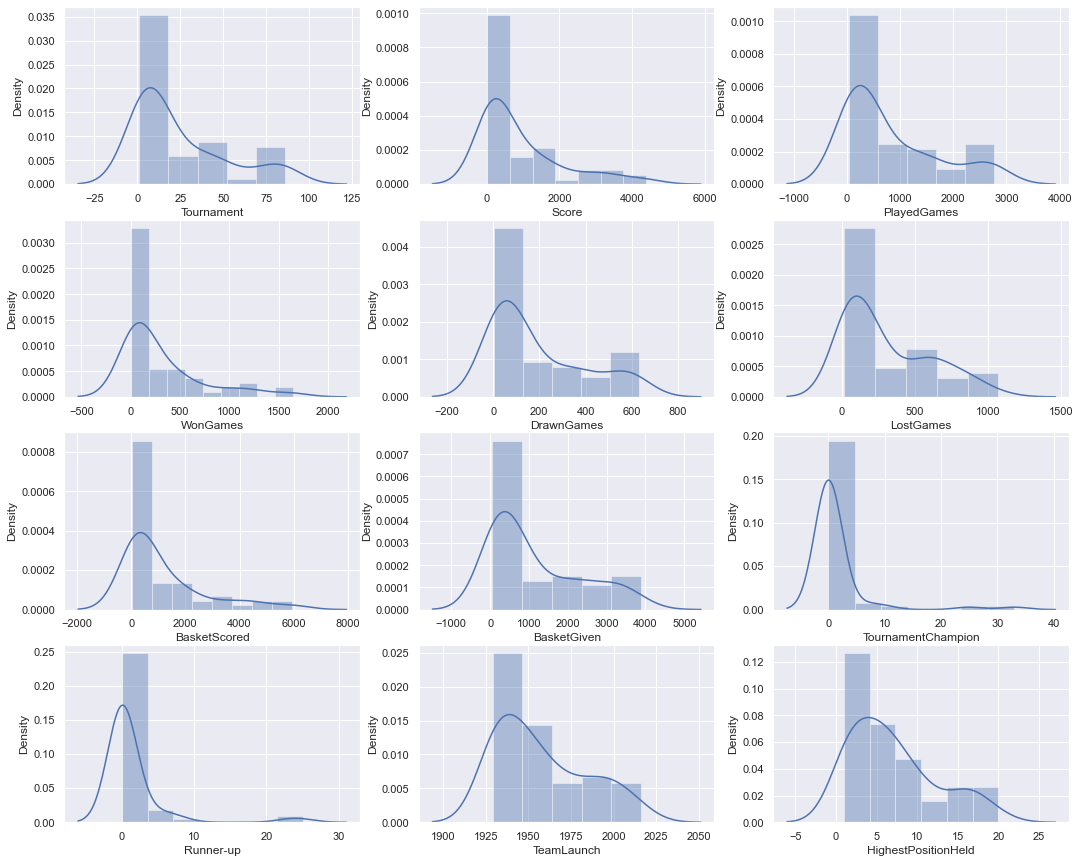

In [44]:
#Plot a distplot to see the distribution of numerical columns

fig,ax=plt.subplots(nrows= 4,ncols = 3,figsize=(18,15))

columns=df1.select_dtypes(np.number).columns

for i,j in enumerate(columns):
    sns.distplot(df1[j],ax=ax.flatten()[i])
    

plt.show()

- As predicted in the descriptive statistics, the data seems to be positively skewed with first bin being highly dense bin for every variable.

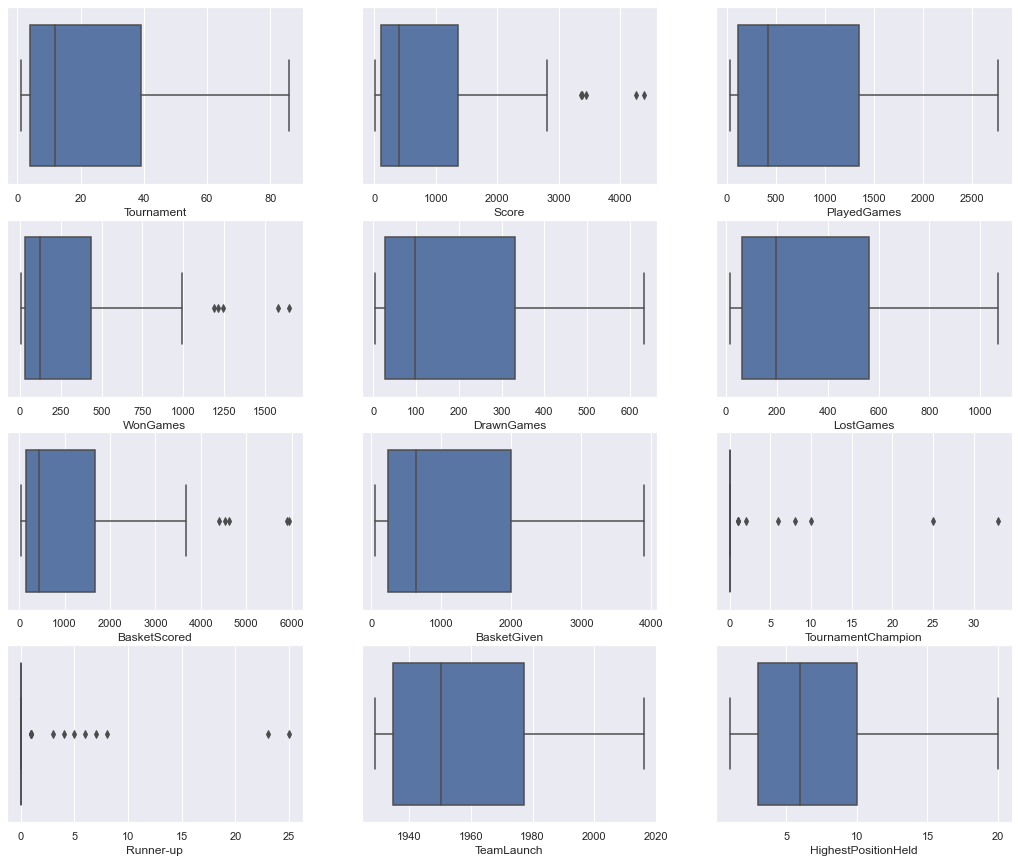

In [45]:
#Plot boxplot for 5 point summary and to detect outliers in each variable.

fig,ax=plt.subplots(nrows= 4,ncols = 3,figsize=(18,15)) #Plot parameters

columns=df1.select_dtypes(np.number).columns

#Plot
for i,j in enumerate(columns):
    sns.boxplot(df1[j],ax=ax.flatten()[i])

plt.show()

- From the above plot we can see that Score, WonGames, BasketScored, TournmentChampion and Runner-up are the variables with outliers present in them.
- TournamentChampion and Runner-up variables has on 2 outliers each with small or no wicks stating that the records in the two variables are segregated within the box.

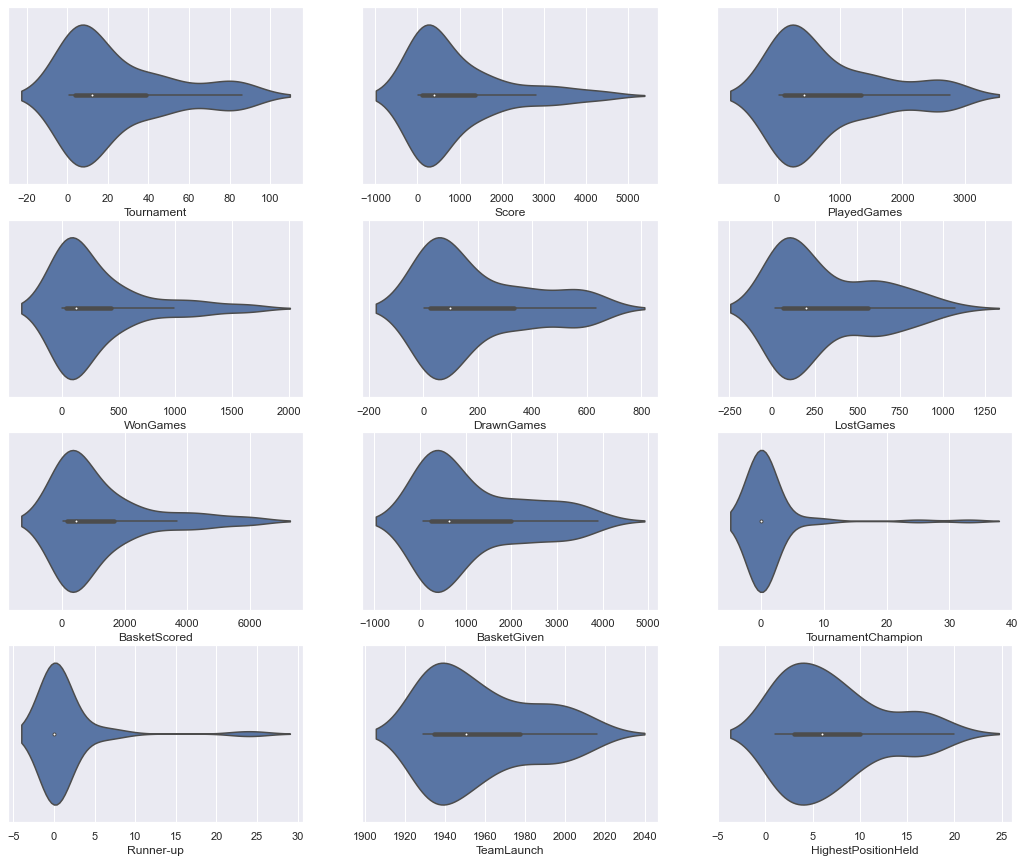

In [46]:
#As box plots doesn't have the ability to visualize the density of the plots, we plot violin plot.

fig,ax=plt.subplots(nrows= 4,ncols = 3,figsize=(18,15)) #Plot parameters

columns=df1.select_dtypes(np.number).columns

#Plot
for i,j in enumerate(columns):
    sns.violinplot(df1[j],ax=ax.flatten()[i])

plt.show()

- By these violin plots, we can confirm the segregation of the data towards one side.

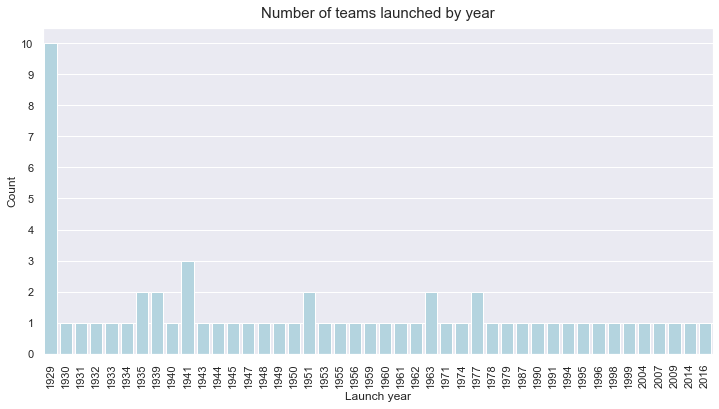

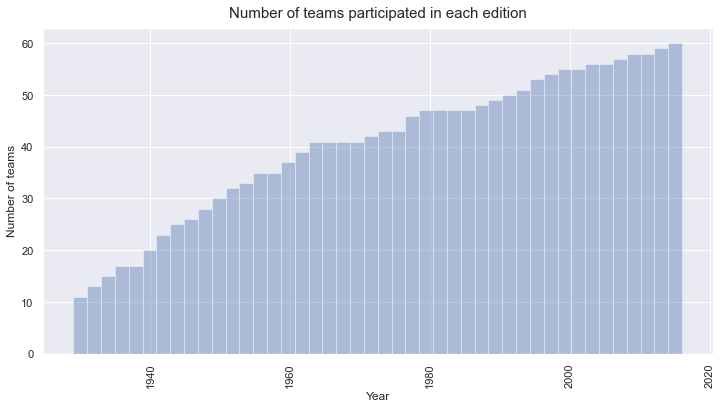

In [47]:
#Plot a countplot to observe the number of teams launched by the years.

plt.figure(figsize=(12,6)) #Figure parameters

#Plot
sns.barplot(x = df1.groupby('TeamLaunch').count().Team.index,
            y=df1.groupby('TeamLaunch').count().Team.values,color='lightblue')
plt.xticks(rotation=90)
plt.yticks([i for i in range(11)])

#Labelling
plt.xlabel('Launch year')
plt.ylabel('Count')
plt.title('Number of teams launched by year',pad=10,fontsize=15)

plt.show()

#Cumulative sum of the team launches.

plt.figure(figsize=(12,6)) #Figure parameters

#Plot
sns.distplot(df1.TeamLaunch,bins=df1.TeamLaunch.nunique(),hist_kws={'cumulative':True},kde=False)

#Labelling
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of teams')
plt.title('Number of teams participated in each edition',pad=10,fontsize=15)

plt.show()

- The tournament started with 10 teams and gradually grew to 60 teams through the years.

## Bivariate Analysis

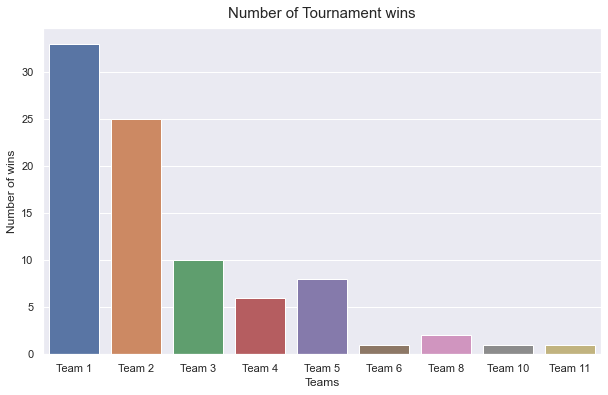

In [48]:
#Plot the tournament winning teams with number of wins.

plt.figure(figsize=(10,6)) #Figure parameters

#Barplot
sns.barplot(x=df1[df1.TournamentChampion!=0].Team,y=df1[df1.TournamentChampion!=0].TournamentChampion)

#Labelling
plt.title('Number of Tournament wins',fontsize=15,pad=10)
plt.xlabel('Teams')
plt.ylabel('Number of wins')
plt.show()

- Team 1 has the highest number of tournament wins.

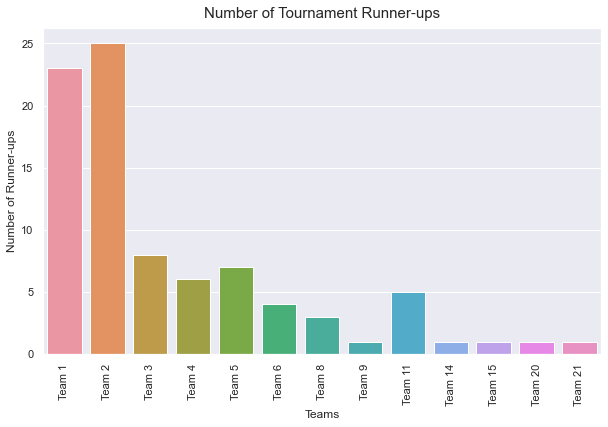

In [49]:
#Plot the runner-up trophy winning teams.

plt.figure(figsize=(10,6)) #Figure parameters

#Barplot
sns.barplot(x=df1[df1['Runner-up']!=0].Team,y=df1[df1['Runner-up']!=0]['Runner-up'])

#Labelling
plt.title('Number of Tournament Runner-ups',fontsize=15,pad=10)
plt.xlabel('Teams')
plt.ylabel('Number of Runner-ups')
plt.xticks(rotation=90)

plt.show()

- Team 2 has the highest number of runner-up trophies.
- We can say that team 1 and team 2 are most successful teams among the oldest teams.

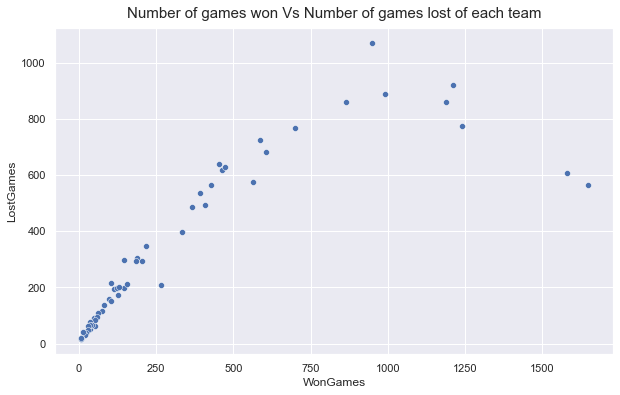

In [50]:
#Scatter plot of Won games and Lost games

plt.figure(figsize=(10,6))
sns.scatterplot(df1.WonGames,df1.LostGames)

plt.title('Number of games won Vs Number of games lost of each team',fontsize=15,pad=10)
plt.show()

- We can observe that the plot is positively correlated. This can be interpreted as most of the teams have similar win to loss ratio. 
- There are few teams with high win rate which are seen as outliers.

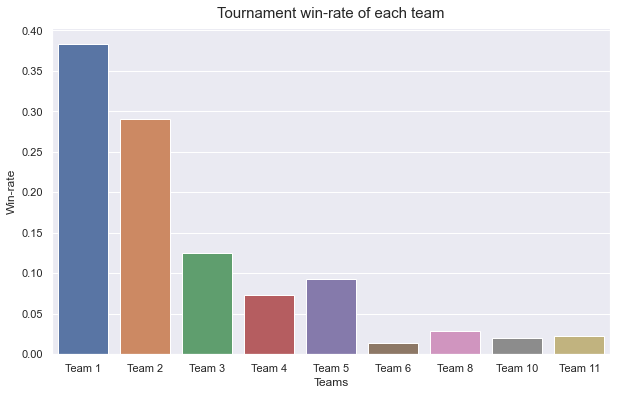

In [51]:
df1['Tournment_win_rate'] = df1.TournamentChampion/df1.Tournament

plt.figure(figsize=(10,6)) #Figure parameters

#Barplot
sns.barplot(x=df1[df1['Tournment_win_rate']!=0].Team,y=df1[df1['Tournment_win_rate']!=0]['Tournment_win_rate'])

#Labelling
plt.title('Tournament win-rate of each team',fontsize=15,pad=10)
plt.xlabel('Teams')
plt.ylabel('Win-rate')

plt.show()

- We can observe from the plot that Team 1 has the highest tournament win rate.

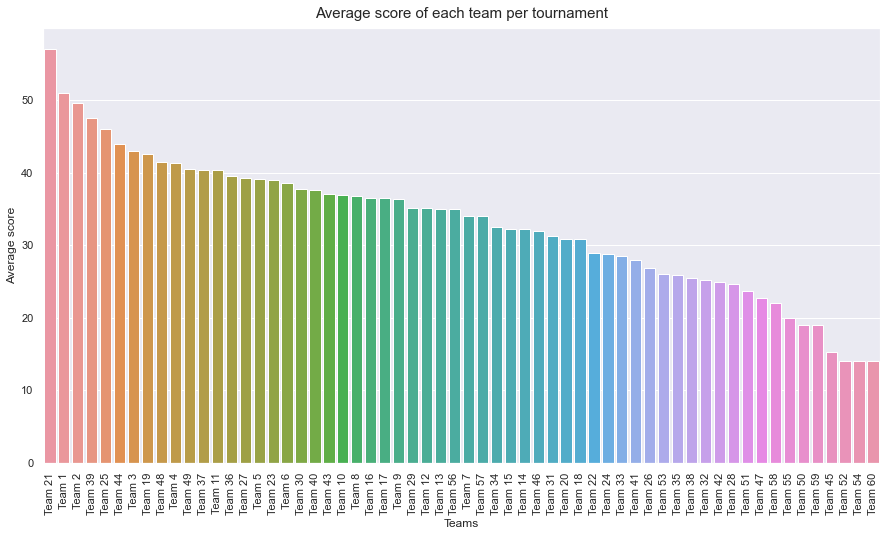

In [52]:
#Creating a new variable and storing the average score of the teams per tournament.
df1['Avg_score_per_tournament']=df1.Score/df1.Tournament

plt.figure(figsize=(15,8)) #Figure parameters

#Plotting
sns.barplot(x=df1.Team,y=df1.Avg_score_per_tournament,
            order=df1.sort_values('Avg_score_per_tournament',ascending=False).Team)

#Labelling
plt.xlabel('Teams')
plt.ylabel('Average score')
plt.title('Average score of each team per tournament',fontsize=15,pad=10)
plt.xticks(rotation=90)

plt.show()

- Team 21 has the highest average score per tournament while Teams 52,54 and 60 has the lowest average

## Multivariate Analysis

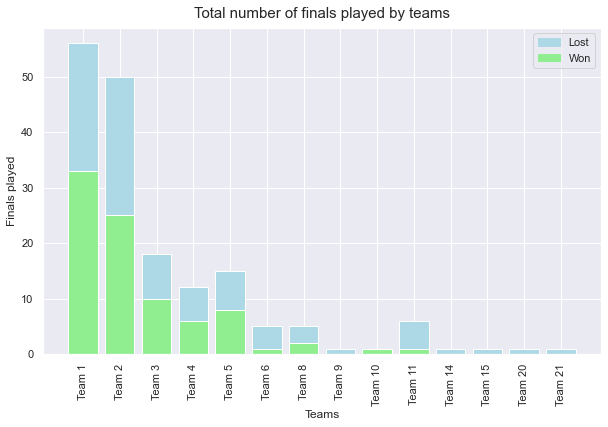

In [53]:
#Creat a new variable with Total number of finals played per team.

df1['Tournment_finals_played'] = df1.TournamentChampion + df1['Runner-up']

#Plot bar graph of the teams with total number of finals participated with finals won/lost.

plt.figure(figsize=(10,6)) #Figure parameters

plt.bar(x=df1[df1['Tournment_finals_played']!=0].Team,
            height=df1[df1['Tournment_finals_played']!=0]['Tournment_finals_played'],color='lightblue')

plt.bar(x=df1[df1['Tournment_finals_played']!=0].Team,
        height=df1[df1['Tournment_finals_played']!=0]['TournamentChampion'],color='lightgreen')

#Create a legend
colors = {'Lost':'lightblue', 'Won':'lightgreen'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

#Labelling
plt.xlabel('Teams')
plt.ylabel('Finals played')
plt.title('Total number of finals played by teams',fontsize=15,pad=10)
plt.xticks(rotation=90)

plt.show()

- We can observe that teams 1 and 2 has the highest amount of finals played and team 1 has converted most of their finals played matches to wins.
- Team 10 is the only team to win the tournament among the teams who appeared only once in the final.

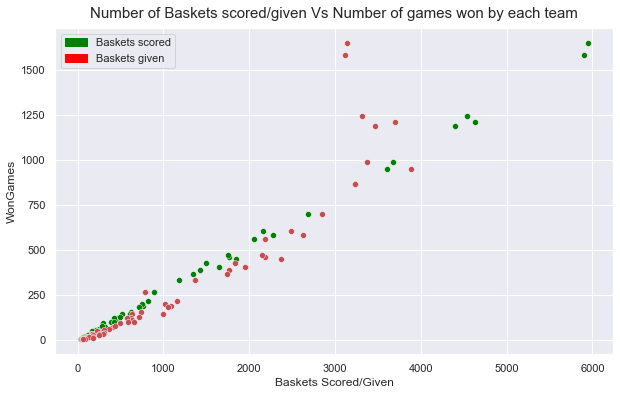

In [54]:
plt.figure(figsize=(10,6)) #Figure parameters

#Scatter plot
sns.scatterplot(df1.BasketScored,df1.WonGames,color='green')
sns.scatterplot(df1.BasketGiven,df1.WonGames,color='r')

#Create a legend
colors = {'Baskets scored':'green', 'Baskets given':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

#Labelling
plt.xlabel('Baskets Scored/Given')
plt.title('Number of Baskets scored/given Vs Number of games won by each team',fontsize=15,pad=10)
plt.show()

- By the above scatter plot we can observe that teams with higher baskets scored has slightly higher win-rate compared to the teams with higher baskets given.
- We can also observe that few teams have huge difference between the number of baskets scored and number of baskets given. These few teams have the highest number of wins compared to the other teams.
- Teams who has high difference between the baskets scored and given have won more number of games.

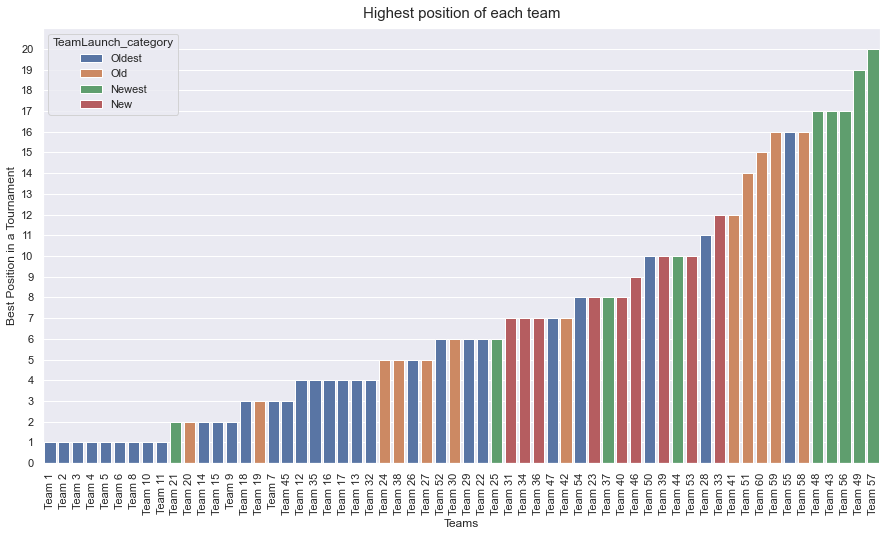

In [55]:
#Let's create a new variable categorising the teams by their launch years

def year_cat(x):
    if x<((df1.TeamLaunch.max()-df1.TeamLaunch.min())/4)+df1.TeamLaunch.min():
        return 'Oldest'
    elif x<2*((df1.TeamLaunch.max()-df1.TeamLaunch.min())/4)+(df1.TeamLaunch.min()) and x>=((df1.TeamLaunch.max()-df1.TeamLaunch.min())/4)+df1.TeamLaunch.min():
        return 'Old'
    elif x<3*((df1.TeamLaunch.max()-df1.TeamLaunch.min())/4)+(df1.TeamLaunch.min()) and x>=2*((df1.TeamLaunch.max()-df1.TeamLaunch.min())/4)+(df1.TeamLaunch.min()):
        return 'New'
    elif x>=3*((df1.TeamLaunch.max()-df1.TeamLaunch.min())/4)+(df1.TeamLaunch.min()):
        return 'Newest'
    
df1['TeamLaunch_category']=df1.TeamLaunch.apply(year_cat)

#Plot a barplot of Highest postition held by each team in the tournament
plt.figure(figsize=(15,8)) #Figure parameters

#Plotting
sns.barplot(x=df1[df1.HighestPositionHeld.notna()].Team,y=df1[df1.HighestPositionHeld.notna()].HighestPositionHeld,hue=df1.TeamLaunch_category,dodge=False,
           order=df1.sort_values('HighestPositionHeld').Team)

#Labelling
plt.title('Highest position of each team',fontsize=15,pad=10)
plt.xlabel('Teams')
plt.xticks(rotation=90)
plt.ylabel('Best Position in a Tournament')
plt.yticks([i for i in range(21)])

plt.show()

- From this plot, we can observe that majority of the Oldest teams has the best average of Position held compared to the teams launched during the later stages of the tournament.
- An interesting observation here is that team 21, which is in the category of newest launched team has their best tournament position of 2. This statistic indicate that the team has been successful among the other teams from the same category and also showing great results for a newly launched team.
- Team 55 is the oldest team which has the worst Best position of 16.

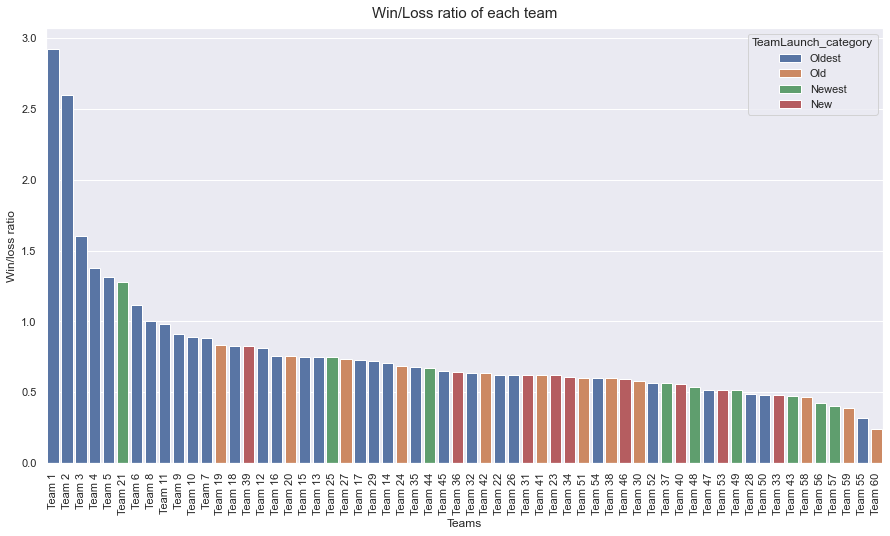

In [56]:
df1['win_loss_ratio'] = df1.WonGames/df1.LostGames

#Plot a barplot of win/loss ratio for each team in the tournament
plt.figure(figsize=(15,8)) #Figure parameters

#Plotting
sns.barplot(x=df1[df1.win_loss_ratio.notna()].Team,y=df1[df1.win_loss_ratio.notna()].win_loss_ratio,hue=df1.TeamLaunch_category,dodge=False,
           order=df1.sort_values('win_loss_ratio',ascending=False).Team)

#Labelling
plt.title('Win/Loss ratio of each team',fontsize=15,pad=10)
plt.xlabel('Teams')
plt.xticks(rotation=90)
plt.ylabel('Win/loss ratio')

plt.show()

- Team 1 has the highest win/loss ratio while the team 60 has the lowest.
- Team 21 among the newest teams has the highest win/loss ratio.

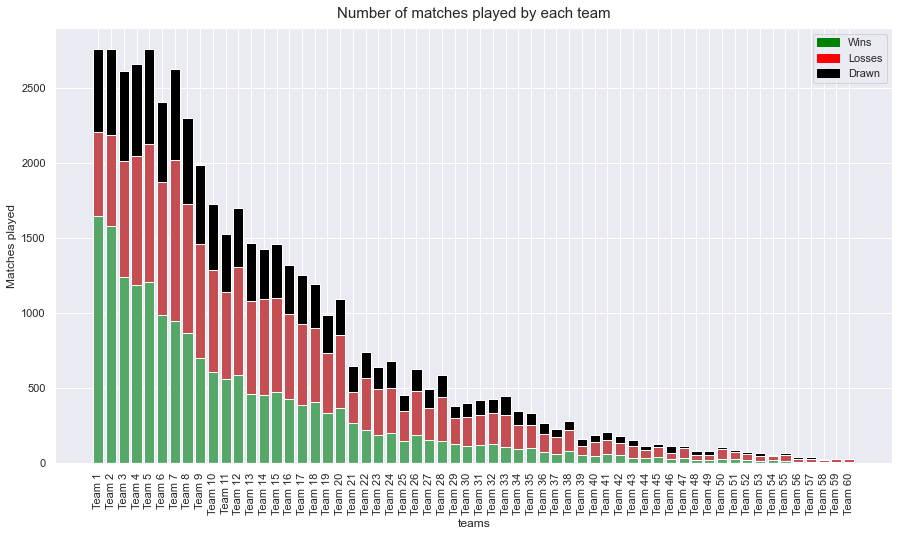

In [57]:
plt.figure(figsize=(15,8)) #Figure parameters

#Plot
plt.bar(height=df1.WonGames+df1.LostGames+df1.DrawnGames,x=df1.Team,color='black')
plt.bar(height=df1.WonGames+df1.LostGames,x=df1.Team,color='r')
plt.bar(height=df1.WonGames,x=df1.Team,color='g')

#Labelling
plt.xlabel('teams')
plt.ylabel('Matches played')
plt.title('Number of matches played by each team',fontsize=15,pad=10)
plt.xticks(rotation=90)

#Create a legend
colors = {'Wins':'green', 'Losses':'red', 'Drawn':'black'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

- Team 1, team 2 and team 5 has the himgest number of matches played and team 1 has the highest number of wins and lowest number of losses.

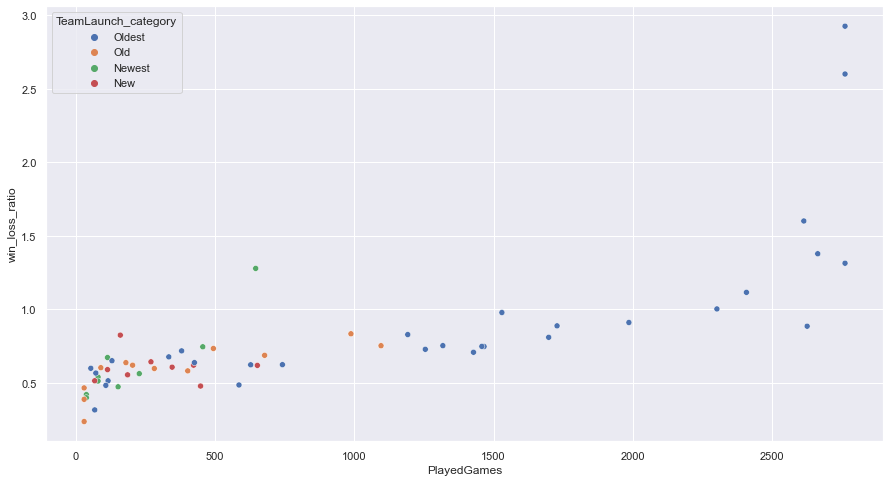

In [58]:
plt.figure(figsize=(15,8)) #Figure parameters

sns.scatterplot(df1.PlayedGames,df1.win_loss_ratio,hue=df1.TeamLaunch_category)

plt.show()

In [59]:
#We can observe that one team among the newest teams stands out with high win loss ratio.

df1[(df1.PlayedGames>500)&(df1.TeamLaunch_category=='Newest')]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Tournment_win_rate,Avg_score_per_tournament,Tournment_finals_played,TeamLaunch_category,win_loss_ratio
20,Team 21,17,970,646,266,172,208,892,789,0,1,1998,2,0.0,57.058824,1,Newest,1.278846


- Team 21 has shown best results in the tournament while being amongst the newest joined teams.

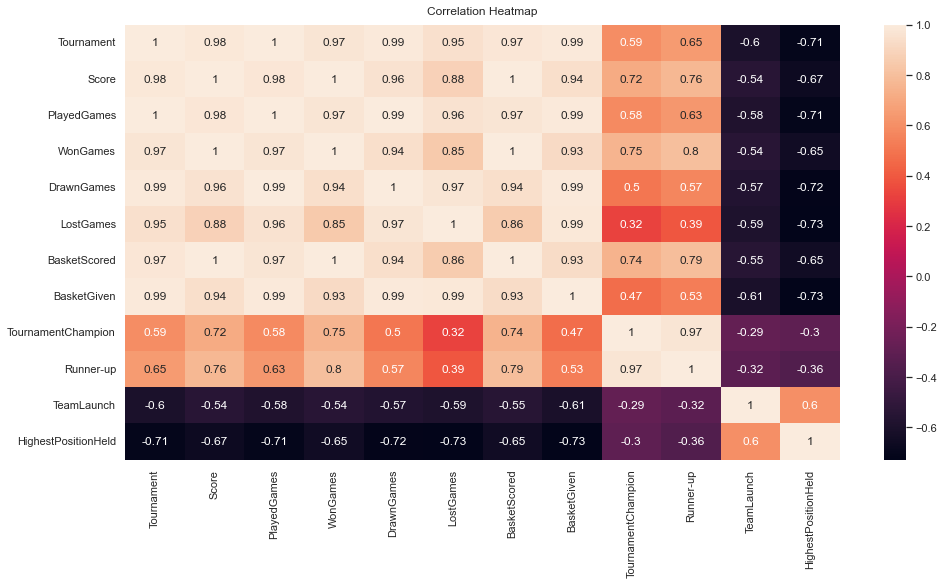

In [60]:
plt.figure(figsize=(16,8))
sns.heatmap(df1[df.columns].corr(),annot=True)
plt.title('Correlation Heatmap',pad=10)
plt.show()

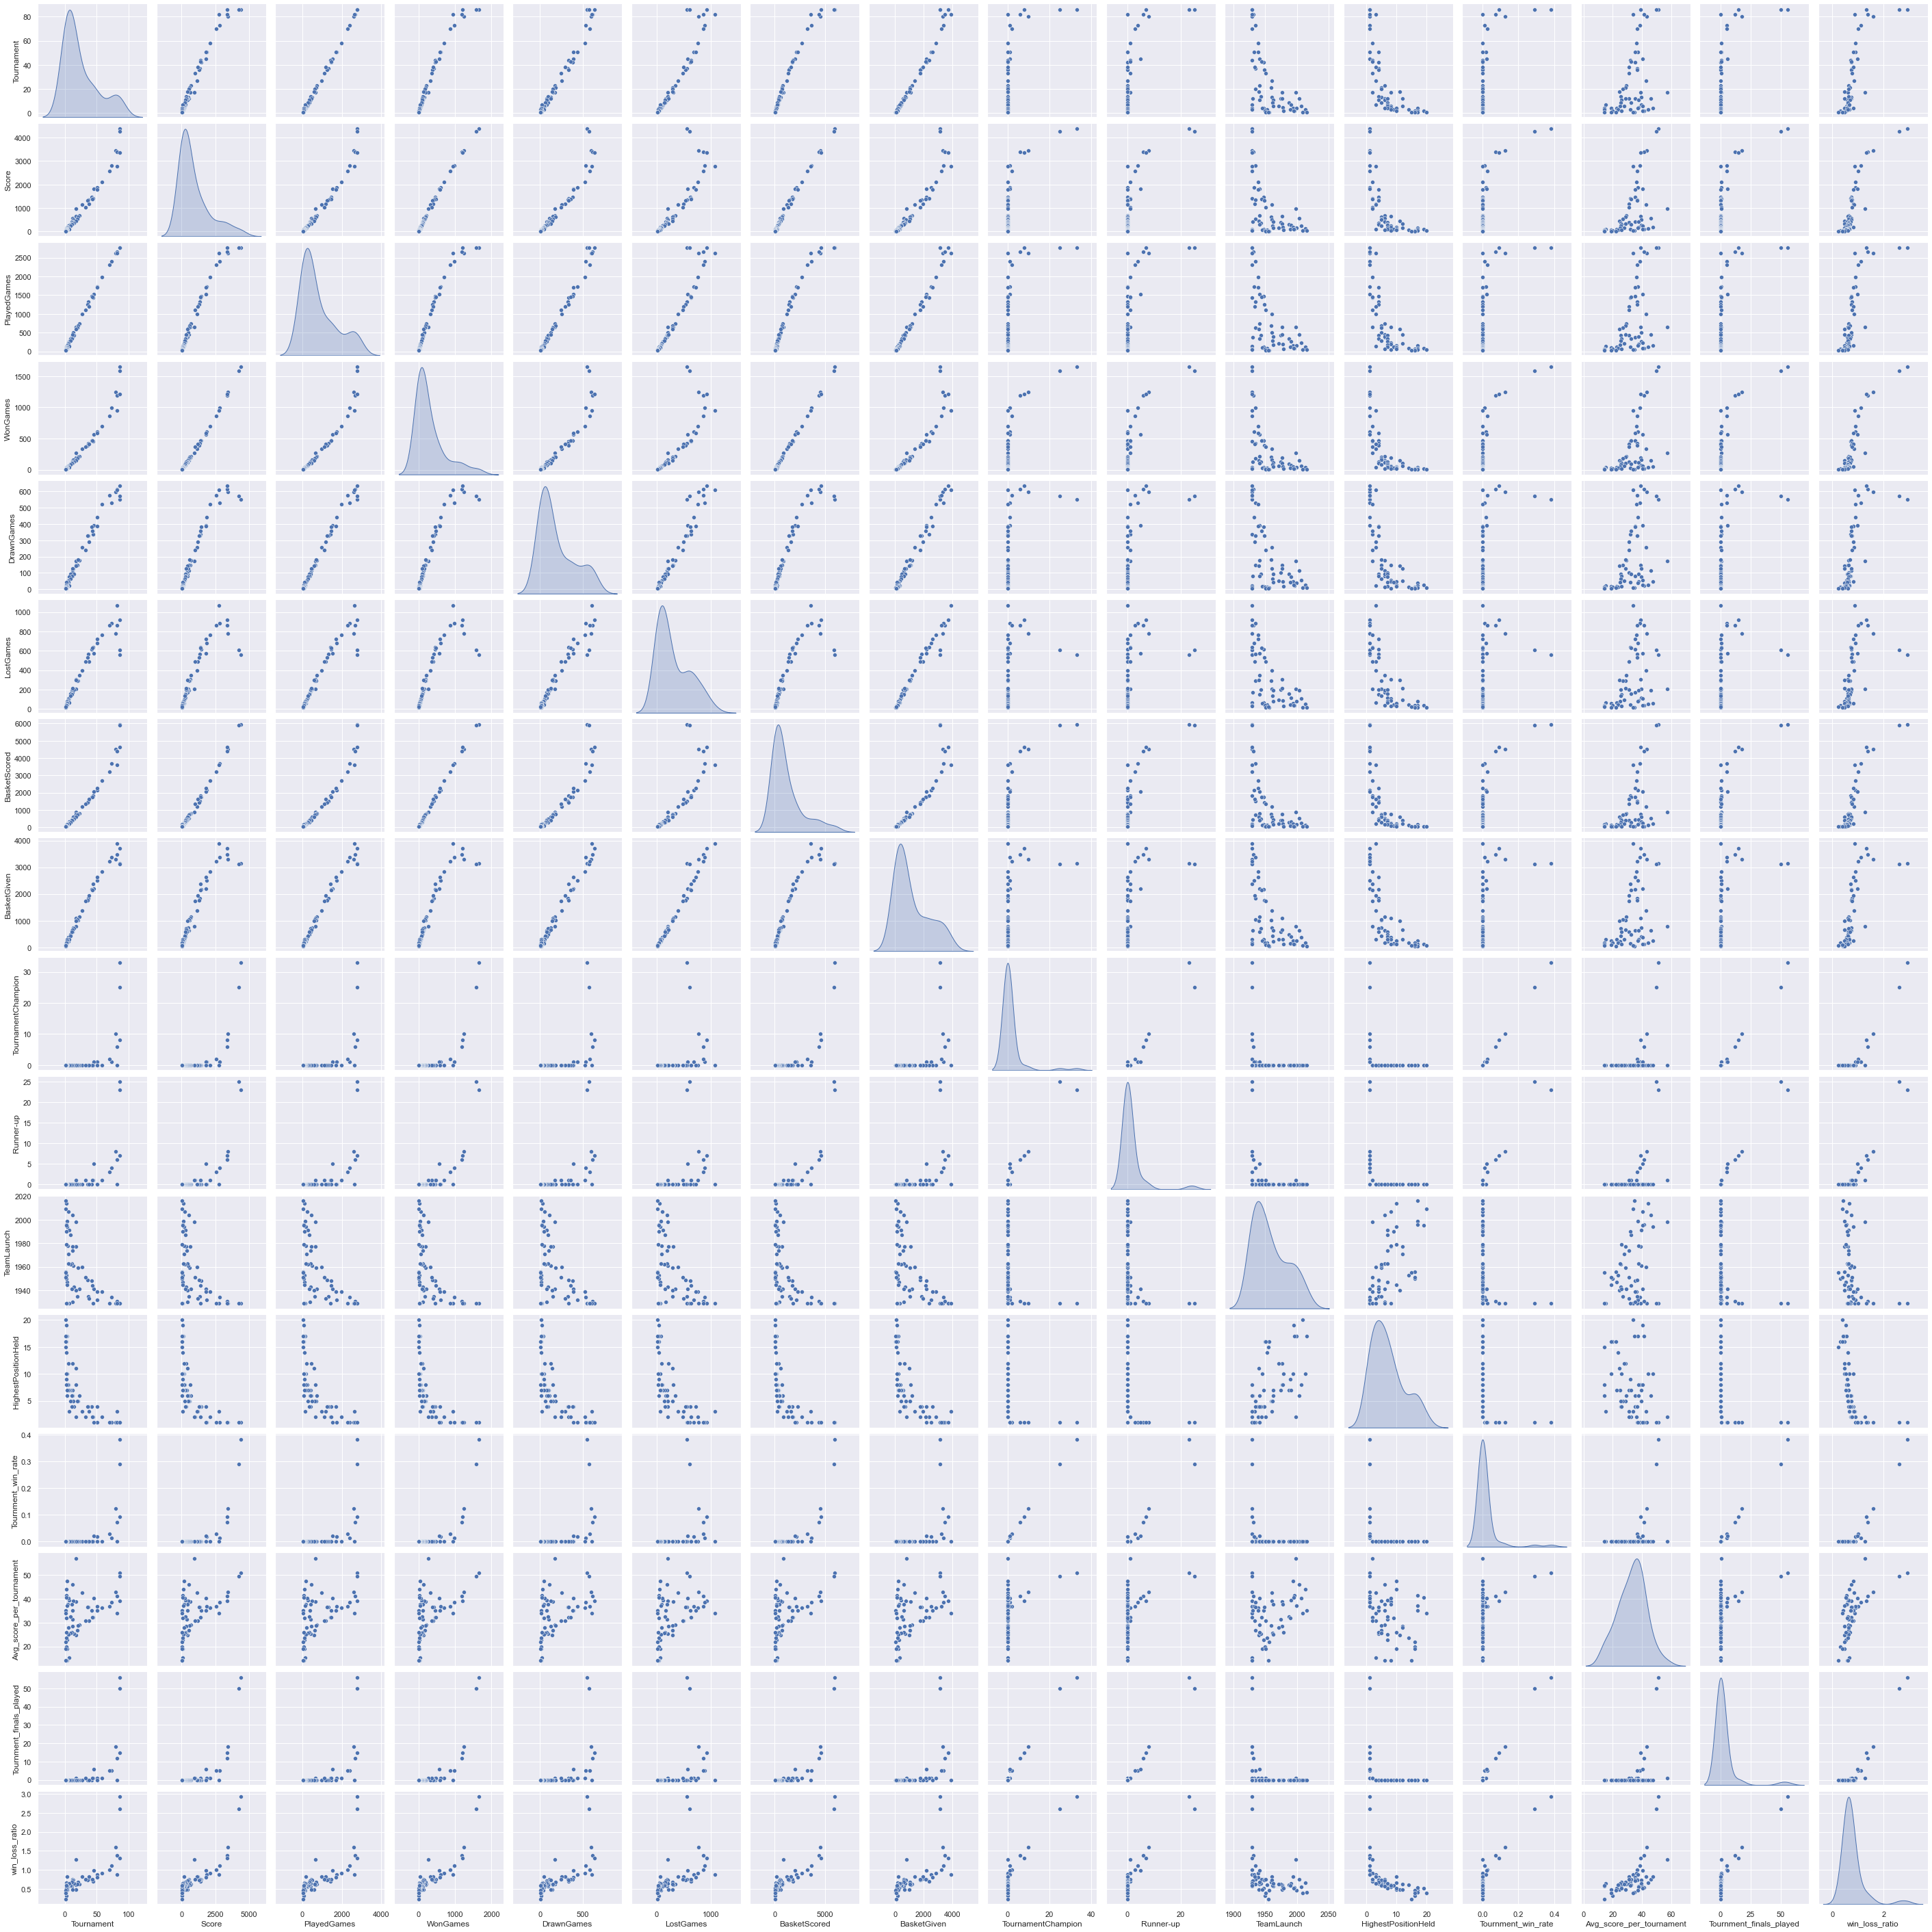

In [61]:
sns.pairplot(df1,diag_kind='kde')

plt.show()

- We can observe that majority of the variables are highly correlated stating that the success of a team is dependant on majority of the statistics.

## Conclusion

In conclusion, our exploratory data analysis (EDA) of the basketball dataset has provided valuable insights into the dynamics of the tournament and the performance of different teams over the years. Through both univariate and multivariate analysis, we have gained a comprehensive understanding of various factors contributing to team success. Let's summarize the key findings:

Outliers and Variable Segregation: We identified outliers in variables such as Score, WonGames, BasketScored, TournamentChampion, and Runner-up. Additionally, TournamentChampion and Runner-up variables showed distinct segregation within the box, indicating a concentration of records. Violin plots further confirmed this data segregation.

Tournament Evolution: Over the years, the tournament expanded from an initial 10 teams to accommodate up to 60 teams. This growth reflects the increasing popularity and participation in the tournament.

Successful Teams: Team 1 emerged as the most successful team with the highest number of tournament wins. Team 2 held the record for the most runner-up trophies, indicating consistent high-level performance.

Oldest Teams' Dominance: Among the oldest teams, Team 1 and Team 2 stood out as the most successful, consistently maintaining high win rates and impressive finals conversion rates.

Win-Loss Ratios: The majority of teams exhibited a positive correlation between wins and losses, suggesting similar win-loss ratios. Notably, certain teams stood out as outliers with exceptionally high win rates.

Baskets Scored and Given: Teams with higher baskets scored generally showed slightly higher win rates. Teams with substantial differences between baskets scored and given demonstrated higher win counts.

Tournament Position: Older teams tended to have better average positions compared to newer teams. Team 21, a recently launched team, notably achieved a remarkable second-place finish, indicating their strong performance within their category.

Team Endorsement: Among the teams, Team 1 remained consistently dominant throughout the tournament's evolution. Their impressive win/loss ratio and numerous wins make them a strong contender for endorsement. Additionally, Team 21 among the newer teams has shown promising results, participating in finals and achieving a favorable win-loss ratio, making them an attractive choice for endorsement.

Overall, our analysis underscores the significance of historical performance, win-loss ratios, and tournament positions in determining team success. Team 1's sustained excellence and Team 21's impressive debut position them as standout options for endorsement. By leveraging these insights, stakeholders can make informed decisions when selecting teams for endorsement, capitalizing on their demonstrated prowess and potential for future success.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Improvements and suggestions 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

To enhance the quality and depth of future basketball dataset analysis, several key improvements in data collection should be considered:

1. Reducing Column collinearity: Address the issue of highly correlated columns, such as WonGames, BasketScored, and Score, which essentially carry the same information. Eliminating such duplicate columns will provide a more accurate representation of team performance, allowing for a more insightful analysis of other crucial factors.

2. Data Completeness: Ensure comprehensive team information is gathered. An example is Team61, which lacks details about the number of games played and baskets scored. To avoid such gaps, focus on collecting complete data for all teams to enable a holistic evaluation of their performance.

3. Increasing Variety: Enrich the dataset by incorporating more diverse and relevant variables. For instance, including player-specific data and additional performance metrics, like player statistics, could offer a more comprehensive understanding of team dynamics and success factors.

4. Expanding Volume: Consider expanding the dataset's volume by integrating player information. This addition will facilitate the analysis of team dynamics in terms of player performance, enabling predictive modeling for team success based on player attributes.

5. Team Composition Analysis: Gather detailed information about the current composition of teams, including player rosters and positions. This will allow for a more accurate evaluation of team strength and potential performance.

6. Ensuring Current Team Participation: Verify the participation status of older teams, such as Team54 and Team52, which have played fewer games than newer teams. Confirm whether these teams are still active and engaged in tournaments to avoid outdated or inaccurate information.

7. Data Veracity: Mitigate outliers and missing values within the dataset to enhance the reliability of analysis outcomes. Cleaning and validating the data will improve the accuracy of insights drawn from the dataset.

8. Comprehensive HighestPositionHeld Data: Include additional details in the HighestPositionHeld column, such as the frequency and context of achieving the highest position. This will offer a more nuanced view of team performance and achievements.

In conclusion, by addressing these suggestions for data collection, future basketball dataset analyses can be significantly enriched. A focus on data quality, variety, volume, and accuracy will empower analysts to derive more meaningful insights and make more informed decisions about team performance, player dynamics, and overall success.